1. 라이브러리를 import해옵니다.

In [23]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
%matplotlib inline

2. 데이터를 불러옵니다.

In [24]:
# load data
train = pd.read_csv("./train.csv", index_col=0)
test = pd.read_csv("./test.csv", index_col=0)
submission = pd.read_csv("./sample_submission.csv")

3. 데이터셋을 만듭니다.

In [25]:
# split data into X and y
X = train.iloc[:,:18]
Y = train.iloc[:,18:]
X

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.365648,17.240883,16.773898,16.484970,16.340403,0.051988,18.13280,17.04065,16.63744,16.38606,16.28741,2,2,1.093010,1.088828,1.097310,1.095145,1.090905
319996,18.685639,17.665802,17.190434,16.816858,16.636688,0.087261,18.52074,17.51310,17.08711,16.74363,16.60173,2,2,1.051689,1.050838,1.052640,1.052152,1.051252
319997,21.188972,18.423357,17.295610,16.901072,16.684127,-0.000010,20.98896,18.30760,17.21518,16.84030,16.63555,31,30,1.193259,1.194140,1.192509,1.192868,1.193683


4. 기본적인 파라미터값 조정으로, 안하셔도 무방합니다. 또한 정확도를 측정해보기 위해 train 데이터를 나눴습니다.

In [26]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

5. 훈련을 시작합니다.

In [27]:
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

C:\Users\82104\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82104\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

6. 결과를 보니 redshift의 영향을 많이 받는 것을 볼 수 있군요.

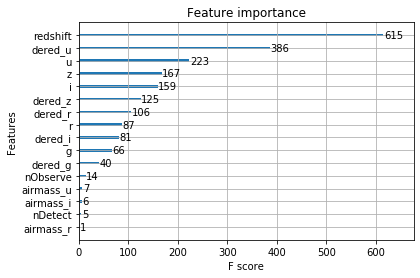

In [33]:
plot_importance(model)

7. 정확도도 측정해봅니다. 아무런 조정 없이 기본만으로도 91프로나 나오는군요.

In [29]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [30]:
# evaluate predictions
mean_squared_error(y_test, y_pred)

0.09231060606060607

In [31]:
# accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.05%


8. 마지막 제출파일을 만듭니다.

In [32]:
# final result
pred = model.predict(test)
submission['class'] = pred
submission.to_csv("submission.csv",index=False, encoding='utf-8-sig')

느낀점:
단순히 xgboost만 돌렸음에도 불구하고 91프로가 나온다는 것은, 데이터 상관관계의 분석이나, 데이터 전처리 과정보다는 파라미터 조정 싸움이 될 수도 있다는 뜻인 것 같군요. 이상 수정해야 할 것이 있다면 댓글로 알려주세요!